In [1]:
import os, fnmatch, glob, h5py
from matplotlib.mlab import psd as get_psd_and_freqs
import numpy as np
import correlation
import matplotlib.pyplot as plt
import bead_util as bu

In [41]:
root_names = []
for root, dirnames, filenames in os.walk('/data/'):
    for dirname in fnmatch.filter(dirnames, '*dipole*'):
        if root[0:11]=='/data/20170':
            root_names.append(root+'/'+dirname)
root_names = sorted(list(set(root_names)))

In [42]:
root_names

['/data/20170530/bead5_15um_QWP/dipoleAC2',
 '/data/20170530/bead5_15um_QWP/dipoleAC3',
 '/data/20170530/bead7_15um_QWP/dipole_integralXY',
 '/data/20170530/bead7_15um_QWP/dipole_integralXY_2',
 '/data/20170530/bead7_15um_QWP/dipole_no_integral',
 '/data/20170620_1/bead4_15um_QWP/dipole1',
 '/data/20170620_1/bead4_15um_QWP/dipole2',
 '/data/20170620_1/bead4_15um_QWP/dipole3_plates',
 '/data/20170620_1/bead4_15um_QWP/dipole3_plates_Y',
 '/data/20170620_1/bead4_15um_QWP/dipole3_plates_Y_again',
 '/data/20170620_1/bead4_15um_QWP/dipole3_plates_Y_again_again',
 '/data/20170620_1/bead4_15um_QWP/dipole4_plates_Y',
 '/data/20170620_1/bead4_15um_QWP/dipole5_plates_Y',
 '/data/20170620_1/bead4_15um_QWP/dipole6_plates_Y',
 '/data/20170620_1/bead4_15um_QWP/dipole7_plates_Y',
 '/data/20170622/bead4_15um_QWP/dipole10_Y',
 '/data/20170622/bead4_15um_QWP/dipole10_Z',
 '/data/20170622/bead4_15um_QWP/dipole11_Y_placebo',
 '/data/20170622/bead4_15um_QWP/dipole11_Z',
 '/data/20170622/bead4_15um_QWP/dipol

In [36]:
file_names = []
root_names = []
for root, dirnames, filenames in os.walk('/data/'):
    for filename in fnmatch.filter(filenames, '*.png'):
        if root[0:11]=='/data/20170' and root.find('steps')>=0:
            file_names.append(root+'/'+filename)
            root_names.append(root)
file_names = sorted(list(set(file_names)))
root_names = sorted(list(set(root_names)))

In [37]:
file_names

['/data/20170717/bead15_15um_QWP/steps/measurement_3/-3e-20e.png',
 '/data/20170717/bead15_15um_QWP/steps/measurement_5/figure_1.png',
 '/data/20170726/bead1_15um_QWP/steps/47_3_new/Z_axis.png',
 '/data/20170726/bead1_15um_QWP/steps/47_3_new/figure_1.png',
 '/data/20170726/bead4_15um_QWP/steps/freq_comb5/test1/figure_1.png',
 '/data/20170726/bead4_15um_QWP/steps/freq_comb5/test2/figure_1.png',
 '/data/20170726/bead8_15um_QWP/steps/47_3Hz_5/2W.png',
 '/data/20170726/bead8_15um_QWP/steps/47_3Hz_5/figure_1.png',
 '/data/20170726/bead8_15um_QWP/steps/47_3Hz_6_+500/2W.png',
 '/data/20170726/bead8_15um_QWP/steps/47_3Hz_6_+500/figure_1.png',
 '/data/20170726/bead8_15um_QWP/steps/_5_+0.png',
 '/data/20170726/bead8_15um_QWP/steps/plates_and_flips/2W.png',
 '/data/20170726/bead8_15um_QWP/steps/plates_and_flips/figure_1.png']

In [32]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


In [ ]:
'/data/20170511/bead2_15um_QWP/new_sensor_feedback/charge43_whole_points/60.0_74.9_75.4'
'/data/20170530/bead7_15um_QWP/dipole_integralXY/'
'/data/20170511/bead2_15um_QWP/new_sensor_feedback/charge44_whole_points'


/data/20170717/bead15_15um_QWP/steps/measurement_3/-3e-20e.png


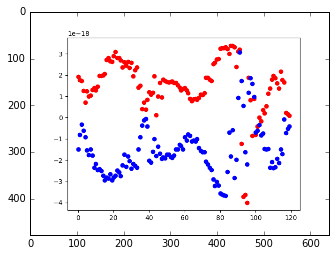

/data/20170717/bead15_15um_QWP/steps/measurement_5/figure_1.png


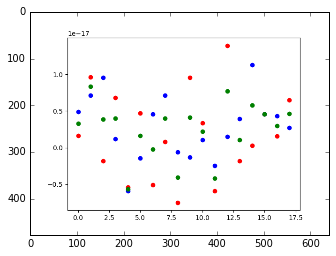

/data/20170726/bead1_15um_QWP/steps/47_3_new/Z_axis.png


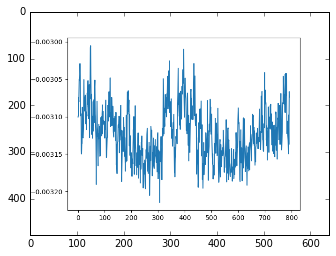

/data/20170726/bead1_15um_QWP/steps/47_3_new/figure_1.png


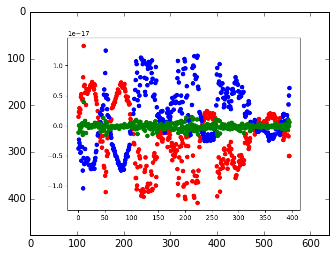

/data/20170726/bead4_15um_QWP/steps/freq_comb5/test1/figure_1.png


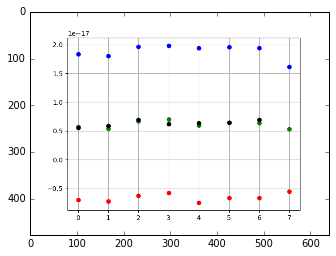

/data/20170726/bead4_15um_QWP/steps/freq_comb5/test2/figure_1.png


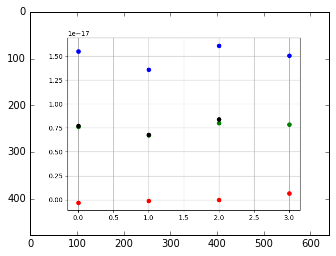

/data/20170726/bead8_15um_QWP/steps/47_3Hz_5/2W.png


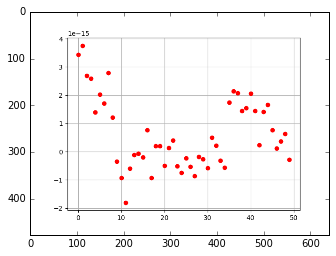

/data/20170726/bead8_15um_QWP/steps/47_3Hz_5/figure_1.png


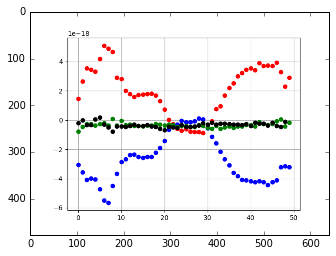

/data/20170726/bead8_15um_QWP/steps/47_3Hz_6_+500/2W.png


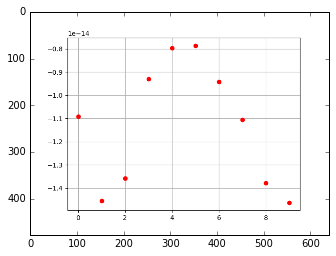

/data/20170726/bead8_15um_QWP/steps/47_3Hz_6_+500/figure_1.png


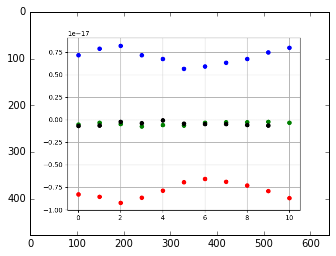

/data/20170726/bead8_15um_QWP/steps/_5_+0.png


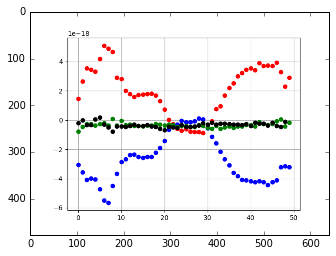

/data/20170726/bead8_15um_QWP/steps/plates_and_flips/2W.png


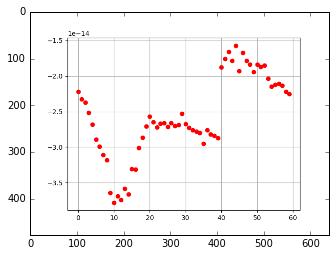

/data/20170726/bead8_15um_QWP/steps/plates_and_flips/figure_1.png


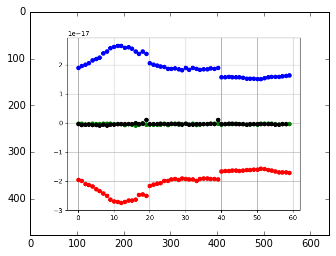

In [38]:
for i in file_names:
    print i
    img=mpimg.imread(i)
    imgplot = plt.imshow(img)
    plt.show()

In [11]:
directories = []
for root, dirnames, filenames in os.walk('/data/'):
    for dirname in fnmatch.filter(dirnames, '*dipole*'):
        if root[0:12]=='/data/201706' and (('Y' in dirname) or ('Z' in dirname)):
            directories.append(root+'/'+dirname)
directories = sorted(list(set(directories)))

In [12]:
directories

['/data/20170620_1/bead4_15um_QWP/dipole3_plates_Y',
 '/data/20170620_1/bead4_15um_QWP/dipole3_plates_Y_again',
 '/data/20170620_1/bead4_15um_QWP/dipole3_plates_Y_again_again',
 '/data/20170620_1/bead4_15um_QWP/dipole4_plates_Y',
 '/data/20170620_1/bead4_15um_QWP/dipole5_plates_Y',
 '/data/20170620_1/bead4_15um_QWP/dipole6_plates_Y',
 '/data/20170620_1/bead4_15um_QWP/dipole7_plates_Y',
 '/data/20170622/bead4_15um_QWP/dipole10_Y',
 '/data/20170622/bead4_15um_QWP/dipole10_Z',
 '/data/20170622/bead4_15um_QWP/dipole11_Y_placebo',
 '/data/20170622/bead4_15um_QWP/dipole11_Z',
 '/data/20170622/bead4_15um_QWP/dipole12_Y_placebo',
 '/data/20170622/bead4_15um_QWP/dipole12_Z',
 '/data/20170622/bead4_15um_QWP/dipole13_Y',
 '/data/20170622/bead4_15um_QWP/dipole13_Z',
 '/data/20170622/bead4_15um_QWP/dipole14_Y',
 '/data/20170622/bead4_15um_QWP/dipole14_Z',
 '/data/20170622/bead4_15um_QWP/dipole15_Y',
 '/data/20170622/bead4_15um_QWP/dipole15_Z',
 '/data/20170622/bead4_15um_QWP/dipole16_Y',
 '/data/20